<a href="https://colab.research.google.com/github/CorinnnaZ/CompPhysChallenge/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4
- Make the sum of (y, Y) = L so that the box plot (for the interactive diagram) is continually scaled properly. Or don't give the opportunity to adjust the Length and keep it fixed at 2. Should probably do that.
- (**Extension Opportunity**): Create the brachistochrone curve with this, by increasingly adding refractive indices to them until it produces that curve. Not sure how to prove that it is that curve but hey-ho.

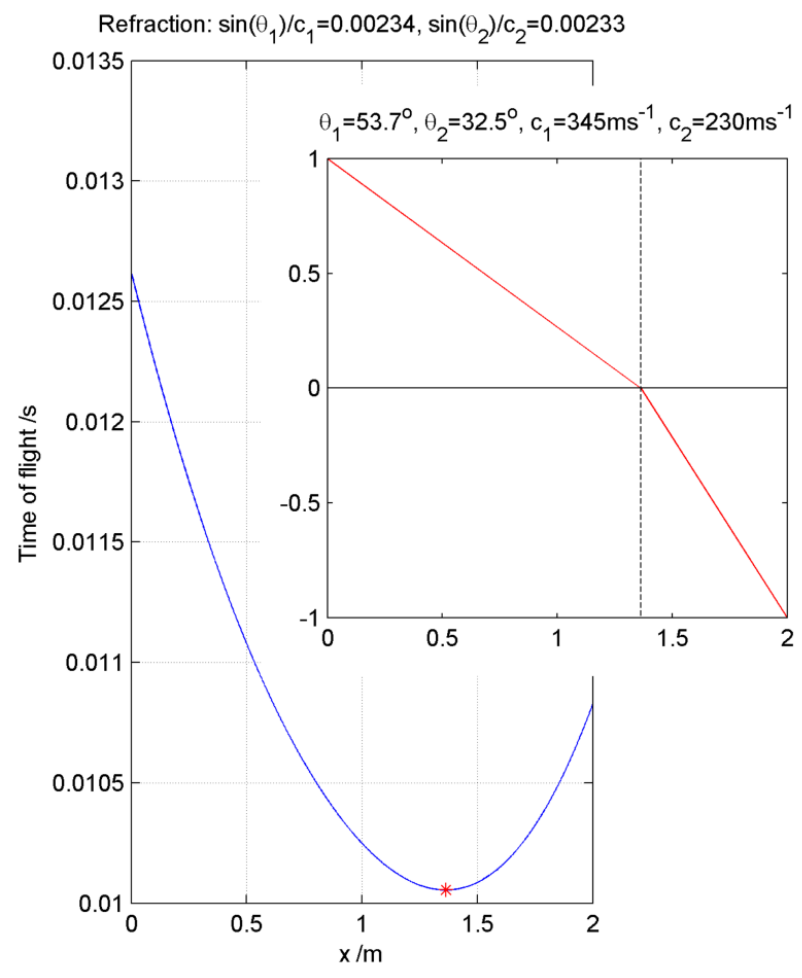

In [37]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import ipywidgets as ipy

In [28]:
# define the symbols used
x, y, Y, L, c, n_1, n_2 = sym.symbols('x y Y L c n_1 n_2', real=True)

# define the function with those symbols
f = ((sym.sqrt(x**2 + y**2))/(c/n_1)) + ((sym.sqrt((L-x)**2 + Y**2))/(c/n_2))

# lambify the function so that it can be called later
f_x = sym.lambdify((x, y, Y, L, c, n_1, n_2),f)

# define function with this i.e. def t(x, {other inputs}): return f_x(x, {other inputs})
def t(x, y, Y, L, c, n_1, n_2):
    return f_x(x, y, Y, L, c, n_1, n_2)

# differentiate the equation
dydx = sym.diff(f, x)

# lambdify this and convert into function
dy_dx = sym.lambdify((x, y, Y, L, c, n_1, n_2), dydx)

def dtdx(x, y, Y, L, c, n_1, n_2):
    return dy_dx(x, y, Y, L, c, n_1, n_2)


print(f"{dydx}\n{f}")


n_1*x/(c*sqrt(x**2 + y**2)) + n_2*(-L + x)/(c*sqrt(Y**2 + (L - x)**2))
n_1*sqrt(x**2 + y**2)/c + n_2*sqrt(Y**2 + (L - x)**2)/c


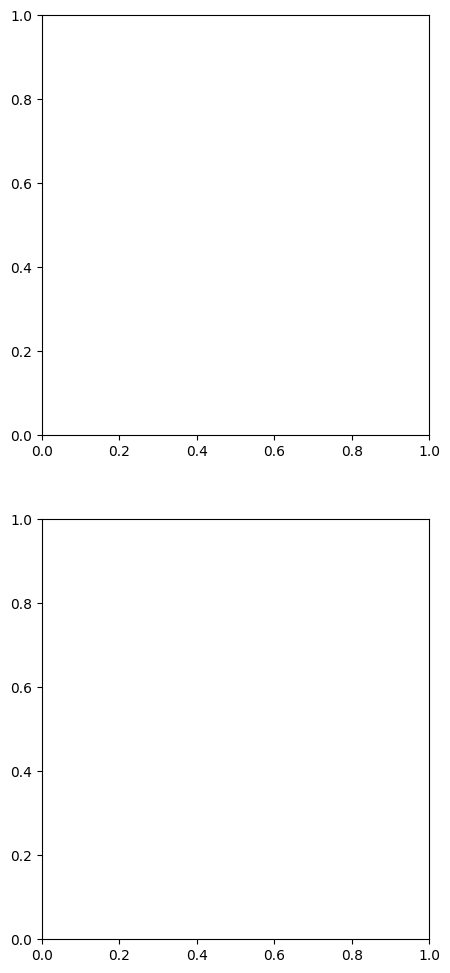

In [62]:
# define figure
fig, (ax1, ax2) = plt.subplots(2, figsize=(5,12))

# plotting function
def plotting_function(L, n_1, n_2):
    # ax1
    ax1.clear()
    ax2.clear()

    y, Y = 1, 1
    def t(x):
        return f_x(x, 10, 10, L, 3e8, n_1, n_2)

    x = np.linspace(0, L, 1000)

    ax1.plot(x, t(x), label='f(x)')

    # minimum values
    minimum = minimize_scalar(t) # unbounded to show the global minimum of function
                                 # rather than using the calculated derivative with sympy
    min_x = minimum.x
    min_time = minimum.fun # min_y

    ax1.axhline(y=min_time,color='r', linestyle="--", label=f"minimum_time = {min_time:.4f}s")
    ax1.axvline(x=min_x, color='r', linestyle='--', label=f"minimising x value = {min_x:.4f}")

    ax1.set_xlabel("Length (m)")
    ax1.set_ylabel("Time (s)")

    ax1.grid()
    ax1.legend(fancybox=True, bbox_to_anchor=(1.5, 1), loc = 'upper right')

    # ax2

    # define the start, refraction, and end points
    start_point = (0, y)
    refraction_point = (min_x, 0)
    end_point = (L, -Y)

    # plot first segment of graph
    ax2.plot([start_point[0], refraction_point[0]],
             [start_point[1], refraction_point[1]], 'r-')

    # plot second segment
    ax2.plot([refraction_point[0], end_point[0]],
             [refraction_point[1], end_point[1]], 'r-')

    ax2.axhline(y=0, color='grey', linestyle='--')
    ax2.axvline(x=min_x, color='grey', linestyle='--')

    # calculate angles
    theta_1 = np.arctan(min_x / y)
    theta_2 = np.arctan((L - min_x) / Y)

    ax2.set_title(rf"Path of Light with $\theta_1$={np.degrees(theta_1):.1f}$^\circ$ and $\theta_2$={np.degrees(theta_2):.1f}$^\circ$")

    # Set axis limits to match the physical setup
    ax2.set_xlim(0, L)
    ax2.set_ylim(-Y, y)

    ax2.set_aspect('equal', adjustable='box')
    ax2.grid()

    display(fig)

In [ ]:
ipy.interact(plotting_function, L=(0,2,0.1), n_1=(0,5,0.5), n_2=(0,5,0.5))